In [81]:
run //home/heather/galvanize/Capstone_1/git_info_wine_ratings/src/helper_functions.py

"cleaner" variable set to df
Missing value replaced with Cabernet
Dropped all null country rows
"cleaned" df ready to go!
   index   country                                        description  points  \
0      0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1      1  Portugal  This is ripe and fruity, a wine that is smooth...      87   

   price           province region_1  \
0    NaN  Sicily & Sardinia     Etna   
1   15.0              Douro      NaN   

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  


In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [83]:
    #use cleaning functions 
path = '~/galvanize/Capstone_1/git_info_wine_ratings/data/winemag-data-130k-v2.csv'
cleaner = DataClean(path)
cleaner.drop_null_rows(['price','country'])
cols = ['country', 'points', 'price', 'province']
df = cleaner.clean_df(cols)

In [84]:
df.head()

,index,country,points,price,province
0,1,Portugal,87,15.0,Douro
1,2,US,87,14.0,Oregon
2,3,US,87,13.0,Michigan
3,4,US,87,65.0,Oregon
4,5,Spain,87,15.0,Northern Spain


In [115]:
non_it_count = region_based_df(df, 'country','Italy', equal_to = False)
italian_count = region_based_df(df, 'country','Italy').groupby('points').count().reset_index()
cali_count = region_based_df(df, 'province','California').groupby('points').count().reset_index()
france_count = region_based_df(df, 'country','France').groupby('points').count().reset_index()

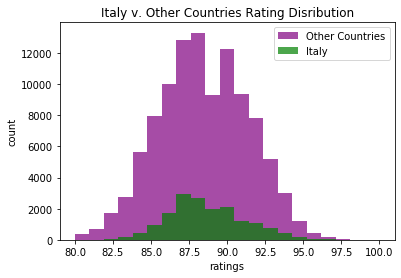

''

In [163]:
fig, ax = plt.subplots(1)
ax.hist(non_it['points'], bins = 21, label='Other Countries', color = 'purple', alpha = 0.7)
ax.hist(italian['points'], bins = 21, label = 'Italy', color = 'g', alpha = 0.7)
ax.set_xlabel('ratings')
ax.set_ylabel('count')
ax.set_title('Italy v. Other Countries Rating Disribution')
ax.legend()
plt.savefig('Italy_Other_hist.png')
plt.show()
;

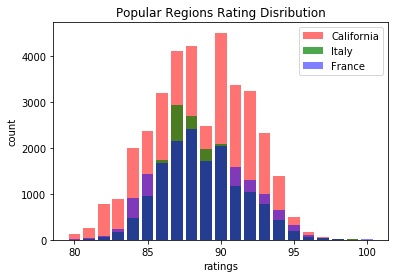

In [164]:
fig, ax = plt.subplots(1)
ax.bar('points', height = 'index', data = cali_count , label = 'California', color = 'r', alpha = 0.55)
ax.bar('points', height = 'index', data = italian_count , label = 'Italy', color = 'g', alpha = 0.7)
ax.bar('points', height = 'index', data = france_count , label = 'France', color = 'b', alpha = 0.5)
ax.set_xlabel('ratings')
ax.set_ylabel('count')
ax.set_title('Popular Regions Rating Disribution')
ax.legend(loc = 1)
plt.savefig('bar_dist.png')
plt.show();

In [178]:
Italy_data = region_based_df(df, 'country', 'Italy')['points']
x_non_it_data = region_based_df(df, 'country', 'Italy', equal_to=False)['points']
dict_for_Italian_heavy = {'Italy':{'data':Italy_data, 'color': 'g', "label": 'Italian_Wine'}, 'Other':{'data':x_non_it_data, 'color':'purple', 'label': 'Non_Italian_Wine'}}

France_data = region_based_df(df, 'country', 'France')['points']
California_data = region_based_df(df, 'province', 'California')['points']


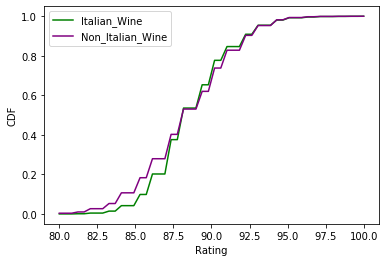

In [176]:
#plot CDF
fig, ax = plt.subplots(1)
plot_cdf_overlay_2(ax, dict_for_Italian_heavy, 80, 100)
ax.set_xlabel('Rating')
ax.set_ylabel('CDF')
plt.show()

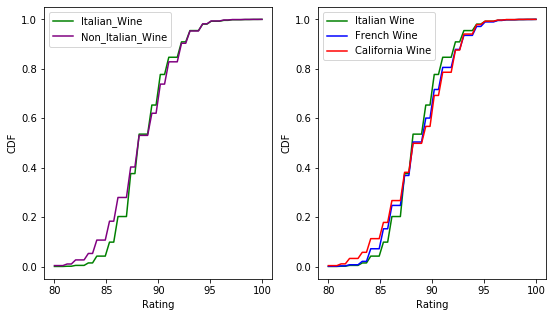

In [179]:
#add values to dictionary

distrib_dict = {'Italy': {'data':Italy_data, 'color': 'green', 'label': 'Italian Wine'}, 'France': {'data':France_data, 'color': 'blue', 'label': 'French Wine'}, 'California':{'data':California_data, 'color':'red', 'label':'California Wine'}}
dict_for_Italian_heavy = {'Italy':{'data':Italy_data, 'color': 'g', "label": 'Italian_Wine'}, 'Other':{'data':x_non_it_data, 'color':'purple', 'label': 'Non_Italian_Wine'}}

fig, ax = plt.subplots(1,2, figsize = (9,5))
plot_cdf_overlay_2(ax[1], distrib_dict, 80, 100)
plot_cdf_overlay_2(ax[0], dict_for_Italian_heavy, 80, 100)
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('CDF')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('CDF')
plt.savefig('side_by_side_cdf.png')
plt.show()